In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
names1880 = pd.read_csv('names/yob1880.txt', names = ['name','sex','births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
years = range(1880,2018)
to_be_concate = []

for year in years:
    path = 'names/yob{0}.txt'.format(year)
    frame = pd.read_csv(path, names = ['name','sex','births'])
    frame['year'] = year
    to_be_concate.append(frame)
    
df_names = pd.concat(to_be_concate, ignore_index = True)
df_names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [5]:
total_births = df_names.pivot_table('births', index = 'year', columns = 'sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1880,90993,110491
1881,91953,100743
1882,107847,113686
1883,112319,104627
1884,129020,114442


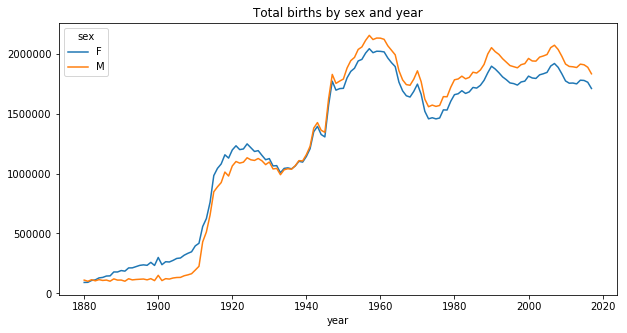

In [6]:
total_births.plot(figsize=(10,5),title='Total births by sex and year')

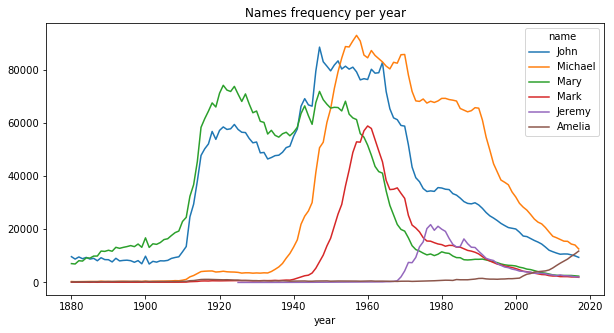

In [7]:
total_births = df_names.pivot_table('births', index = 'year', columns = 'name', aggfunc=sum)
names_frequency = total_births[['John','Michael','Mary','Mark','Jeremy','Amelia']]
names_frequency.head()
names_frequency.plot(figsize=(10,5),title = 'Names frequency per year')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001187BFD0>,
      dtype=object)

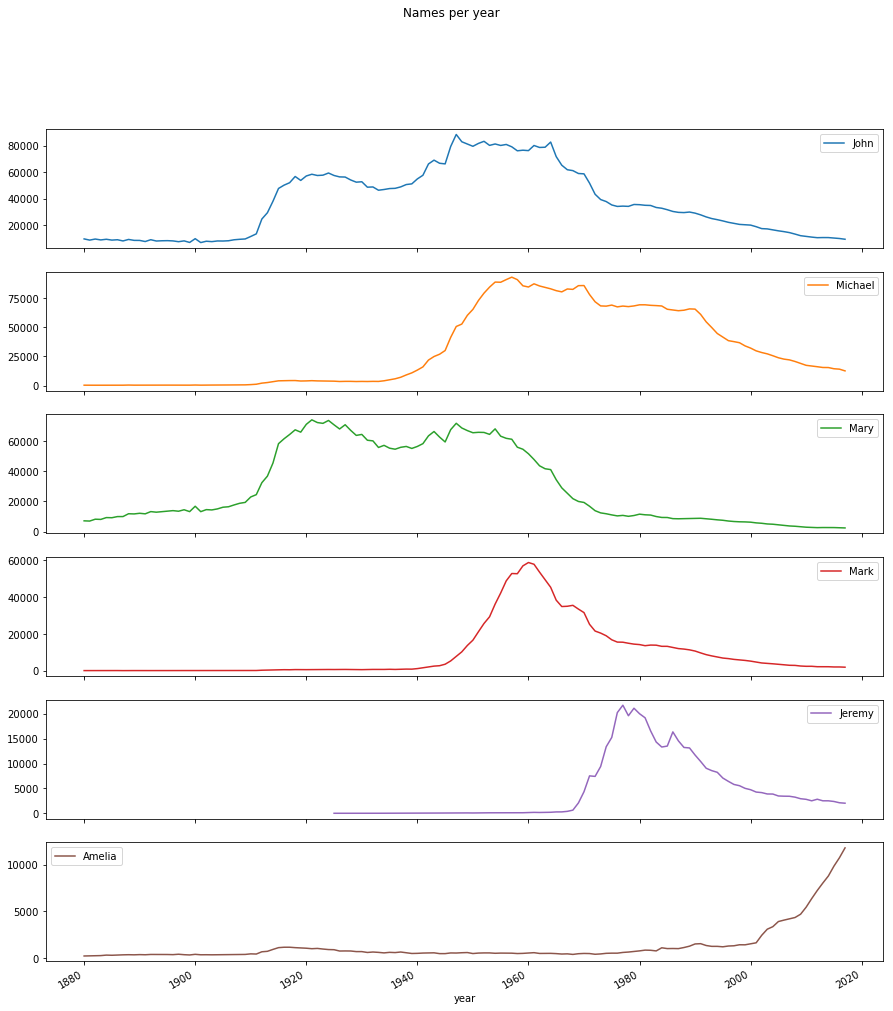

In [8]:
names_frequency.plot(subplots=True, figsize=(15,17), grid=False, title='Names per year')

In [9]:
#distribution of boys; names by final letter over 100years
get_last_letter = lambda x:x[-1]
last_letters = df_names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = df_names.pivot_table('births', index=last_letters, columns=['sex','year'],aggfunc=sum)

In [10]:
subtable = table.reindex(columns=[1912,1962,2012],level='year')
subtable.head()

sex                 F                            M                    
year             1912      1962      2012     1912      1962      2012
last_letter                                                           
a            149178.0  682541.0  654517.0   1655.0    5331.0   27201.0
b                 NaN     459.0     471.0    923.0    3458.0   34706.0
c                 NaN      73.0    1235.0   1053.0   17881.0   24268.0
d             10523.0    3673.0    2530.0  54090.0  249996.0   42457.0
e            180522.0  424745.0  320528.0  54716.0  164952.0  128430.0

In [11]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop.head()

sex                 F                             M                    
year             1912      1962      2012      1912      1962      2012
last_letter                                                            
a            0.267288  0.347073  0.372450  0.003849  0.002577  0.014368
b                 NaN  0.000233  0.000268  0.002147  0.001672  0.018333
c                 NaN  0.000037  0.000703  0.002449  0.008644  0.012819
d            0.018854  0.001868  0.001440  0.125806  0.120849  0.022427
e            0.323448  0.215983  0.182395  0.127262  0.079738  0.067840

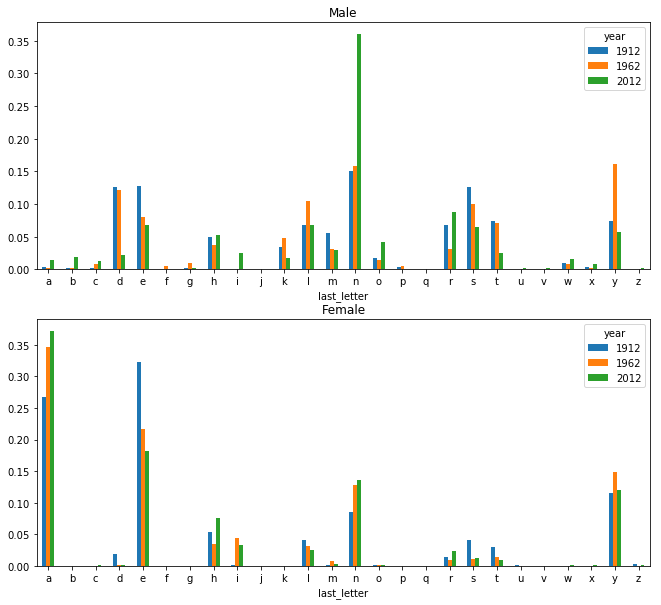

In [12]:
fig, axes = plt.subplots(2,1,figsize=(11,10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1],title='Female')

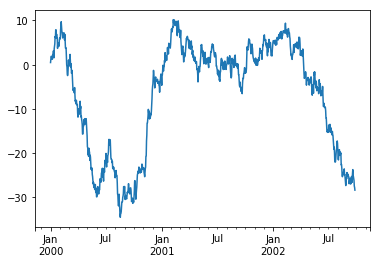

In [14]:
import numpy as np
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()